In [52]:
import networkx as nx
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load
from synutility.SynVis.graph_visualizer import GraphVisualizer

In [ ]:
data = load('data/ITS_graphs.pkl.gz')

In [54]:
# WP 1: find reaction center

def get_reaction_center(its_graph):

    def filter_rcs(G, u, v):
        return G.edges[u, v]['standard_order'] != 0
    
    reaction_center = nx.subgraph_view(its_graph, filter_edge=lambda u, v: filter_rcs(its_graph, u, v)).copy()
    reaction_center.remove_nodes_from(list(nx.isolates(reaction_center)))

    return reaction_center

In [55]:
# WP 1: calculate all reaction centers

for reaction in data:
    
    its_graph = reaction['ITS']
    reaction_center = get_reaction_center(its_graph)
    reaction['RC'] = reaction_center

In [56]:
data[0]

{'R-id': 7873,
 'ITS': <networkx.classes.graph.Graph at 0x246a91cac50>,
 'class': 0,
 'RC': <networkx.classes.graph.Graph at 0x2471af09410>}

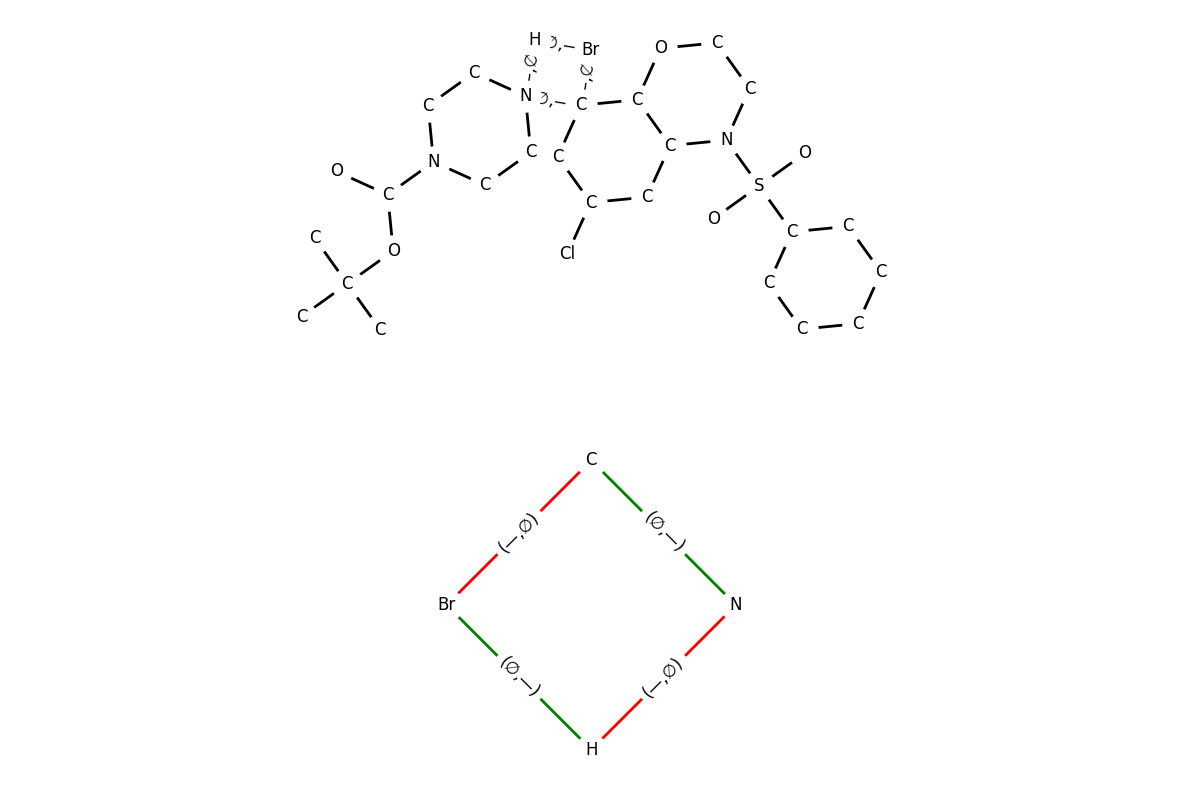

In [57]:
its_graph = data[0]['ITS']
reaction_center = data[0]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(its_graph, ax[0], use_edge_color=True)
vis.plot_its(reaction_center, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [67]:
# WP 2:

clusters = dict()

for reaction in data:
    rc = reaction['RC']
    for rc_key in clusters.keys():

        if nx.is_isomorphic(
            rc,
            rc_key,
            lambda n1, n2: n1['charge'] == n2['charge'] and n1['element'] == n2['element'],
            lambda e1, e2: e1['order'] == e2['order']
        ):
            clusters[rc_key].append(reaction)
            break
    else:

        clusters[rc] = [reaction]

In [68]:
len(clusters)

299

In [65]:
clusters

{<networkx.classes.graph.Graph at 0x2471af09410>: [<networkx.classes.graph.Graph at 0x2471af09410>,
  ...],
 <networkx.classes.graph.Graph at 0x2471a429910>: [<networkx.classes.graph.Graph at 0x2471a429910>,
 <networkx.classes.graph.Graph at 0x2471aa4b850>: [<networkx.classes.graph.Graph at 0x2471aa4b850>,
  ...],
 <networkx.classes.graph.Graph at 0x24710425c90>: [<networkx.classes.graph.Graph at 0x24710425c90>,
  ...],
 <networkx.classes.graph.Graph at 0x2471c043110>: [<networkx.classes.graph.Graph at 0x2471c043110>,
 <networkx.classes.graph.Graph at 0x2471d92f050>: [<networkx.classes.graph.Graph at 0x2471d92f050>,
  ...],
 <networkx.classes.graph.Graph at 0x2471d5e9010>: [<networkx.classes.graph.Graph at 0x2471d5e9010>,
  ...],
 <networkx.classes.graph.Graph at 0x2471e480d90>: [<networkx.classes.graph.Graph at 0x2471e480d90>,
 <networkx.classes.graph.Graph at 0x2471e0e1290>: [<networkx.classes.graph.Graph at 0x2471e0e1290>,
  ...],
 <networkx.classes.graph.Graph at 0x2471e5799d0>: [<

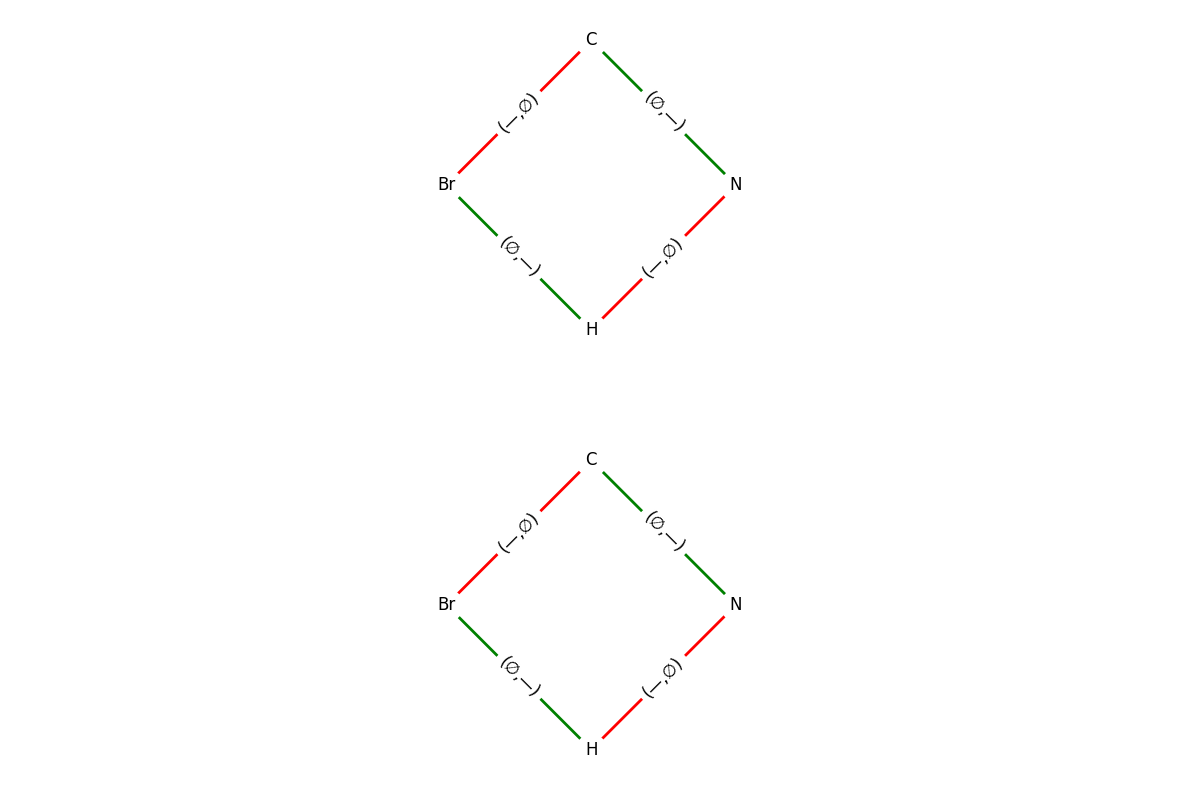

In [71]:
first_cluster = next(iter(clusters.values()))

rc1 = first_cluster[0]['RC']
rc2 = first_cluster[1]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(rc1, ax[0], use_edge_color=True)
vis.plot_its(rc2, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [72]:
len(data)

34395